In [1]:
import os

os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Download the dataset
!kaggle competitions download -c deepfake-detection-challenge
# Unzip the downloaded file
!unzip deepfake-detection-challenge.zip -d deepfake-dataset


^C


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import os

# List files in the dataset directory
dataset_path = 'deepfake-dataset'
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        print(os.path.join(root, file))


deepfake-dataset/sample_submission.csv
deepfake-dataset/test_videos/cnxccbjlct.mp4
deepfake-dataset/test_videos/cosghhimnd.mp4
deepfake-dataset/test_videos/ybbrkacebd.mp4
deepfake-dataset/test_videos/acazlolrpz.mp4
deepfake-dataset/test_videos/iznnzjvaxc.mp4
deepfake-dataset/test_videos/gkutjglghz.mp4
deepfake-dataset/test_videos/zyufpqvpyu.mp4
deepfake-dataset/test_videos/cekwtyxdoo.mp4
deepfake-dataset/test_videos/iorbtaarte.mp4
deepfake-dataset/test_videos/cqxxumarvp.mp4
deepfake-dataset/test_videos/hitfycdavv.mp4
deepfake-dataset/test_videos/aomqqjipcp.mp4
deepfake-dataset/test_videos/rmlzgerevr.mp4
deepfake-dataset/test_videos/bofrwgeyjo.mp4
deepfake-dataset/test_videos/cjkctqqakb.mp4
deepfake-dataset/test_videos/gbnzicjyhz.mp4
deepfake-dataset/test_videos/oysopgovhu.mp4
deepfake-dataset/test_videos/gqnaxievjx.mp4
deepfake-dataset/test_videos/hcanfkwivl.mp4
deepfake-dataset/test_videos/ywxpquomgt.mp4
deepfake-dataset/test_videos/mllzkpgatp.mp4
deepfake-dataset/test_videos/rtpbawlm

In [6]:
!pip install -U --upgrade tensorflow

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [8]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import imageio

In [9]:
DATA_FOLDER = 'deepfake-dataset'
TEST_FOLDER = 'test_videos'
TRAIN_SAMPLE_FOLDER = 'train_sample_videos'

print(f"Train samples: {len(os.listdir(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER)))}")
print(f"Test samples: {len(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER)))}")

Train samples: 401
Test samples: 400


In [10]:
train_sample_metadata = pd.read_json('deepfake-dataset/train_sample_videos/metadata.json').T
train_sample_metadata.head()

label  split        original
aagfhgtpmv.mp4  FAKE  train  vudstovrck.mp4
aapnvogymq.mp4  FAKE  train  jdubbvfswz.mp4
abarnvbtwb.mp4  REAL  train            None
abofeumbvv.mp4  FAKE  train  atvmxvwyns.mp4
abqwwspghj.mp4  FAKE  train  qzimuostzz.mp4

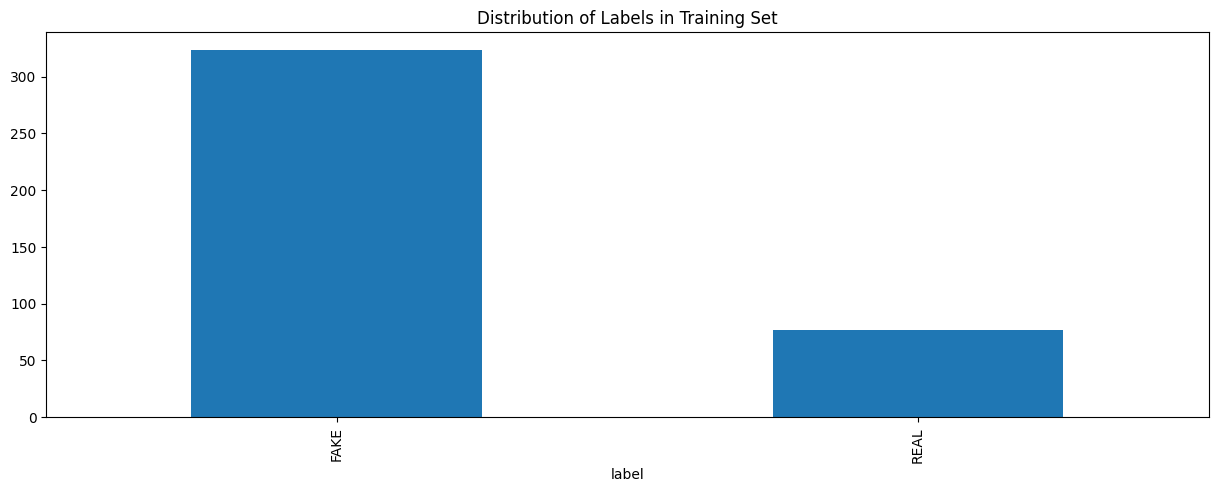

In [11]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar',title = "Distribution of Labels in Training Set")
plt.show()

In [12]:
train_sample_metadata.shape

(400, 3)

In [13]:
fake_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label == 'FAKE'].sample(10).index)
fake_train_sample_video

['btjlfpzbdu.mp4',
 'arkroixhey.mp4',
 'btohlidmru.mp4',
 'bourlmzsio.mp4',
 'avywawptfc.mp4',
 'ebywfrmhtd.mp4',
 'dptbnjnkdg.mp4',
 'ddhfabwpuz.mp4',
 'ekhacizpah.mp4',
 'eiriyukqqy.mp4']

In [14]:
def display_image_from_videos(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(frame)

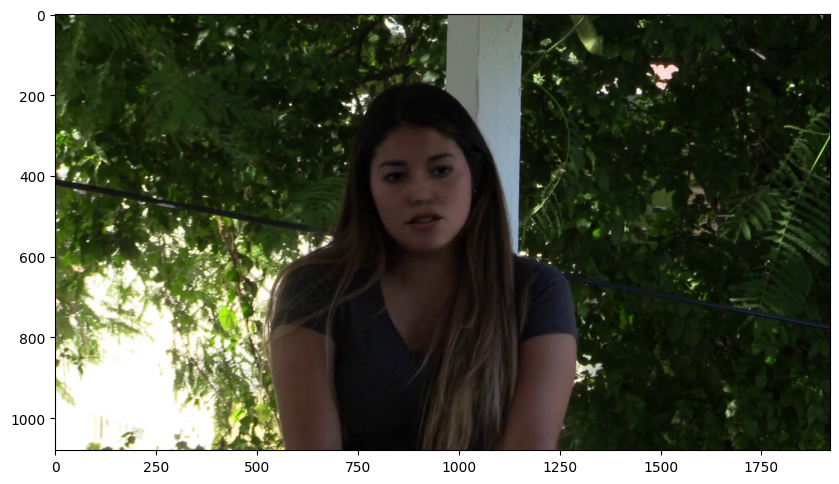

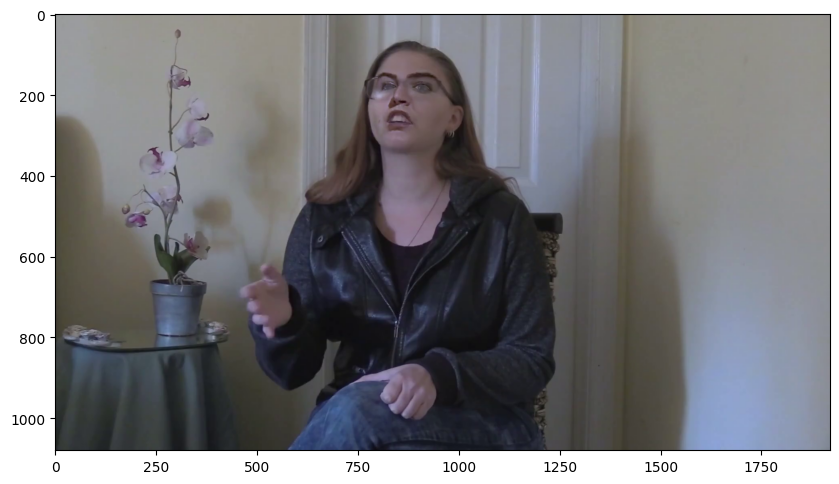

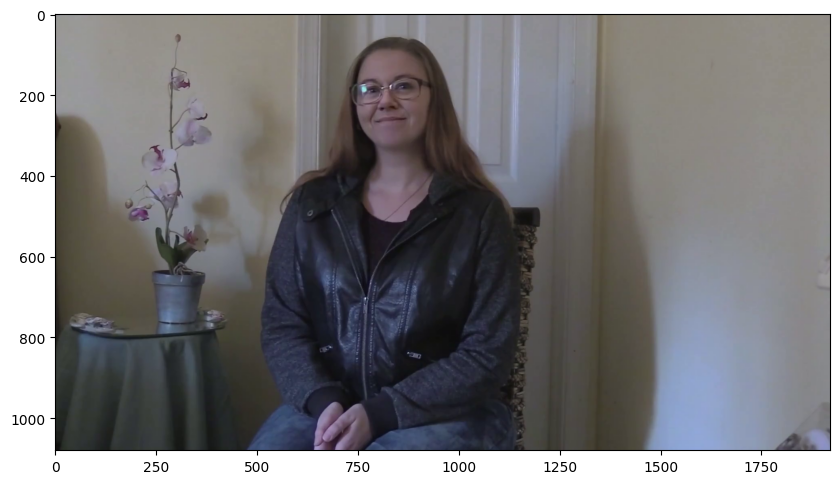

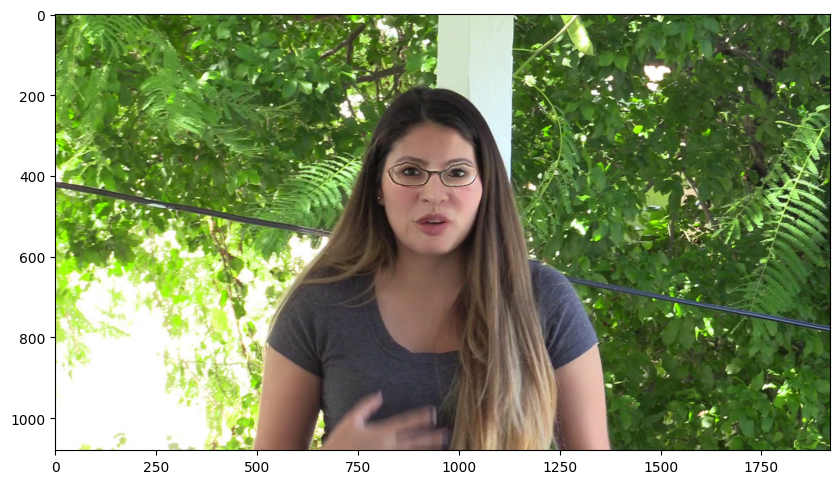

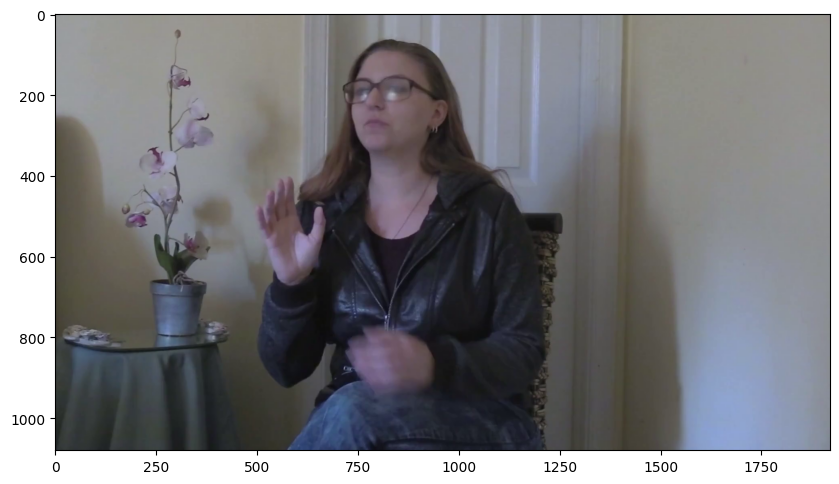

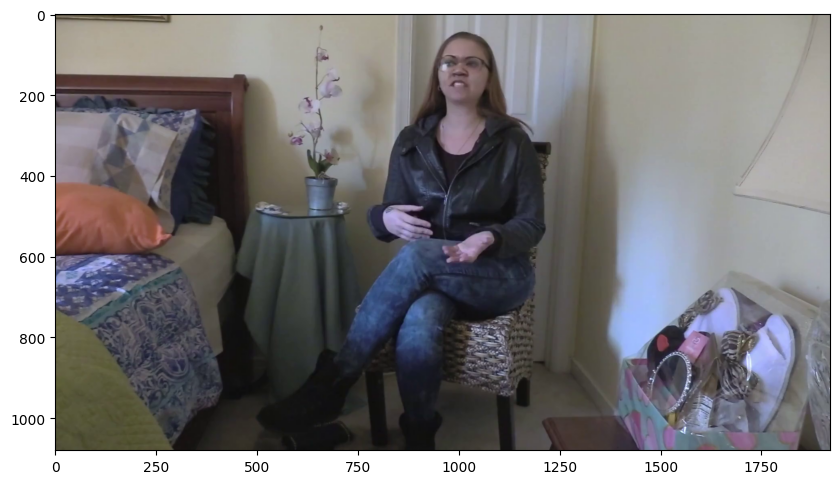

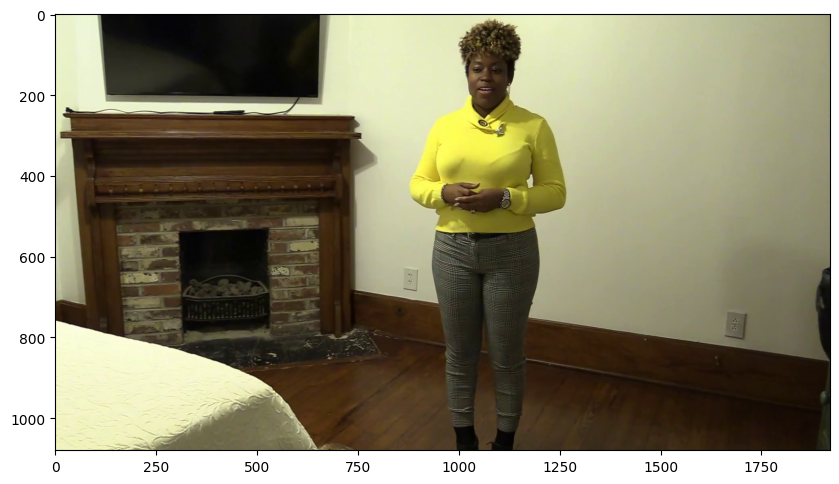

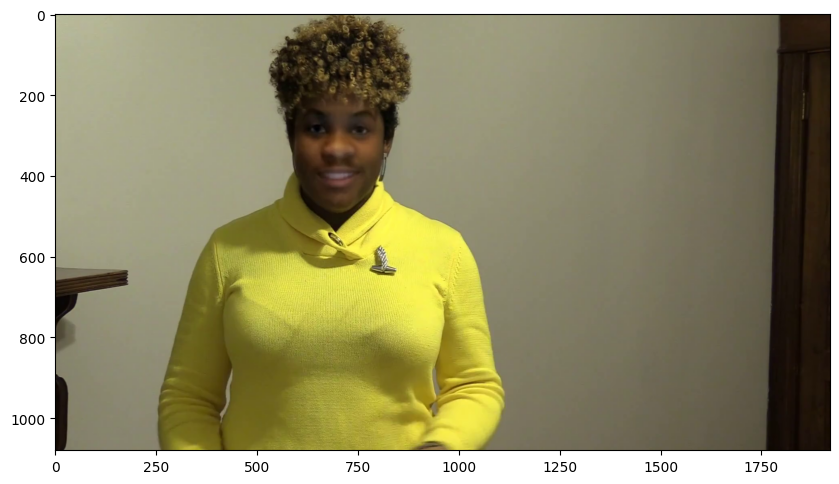

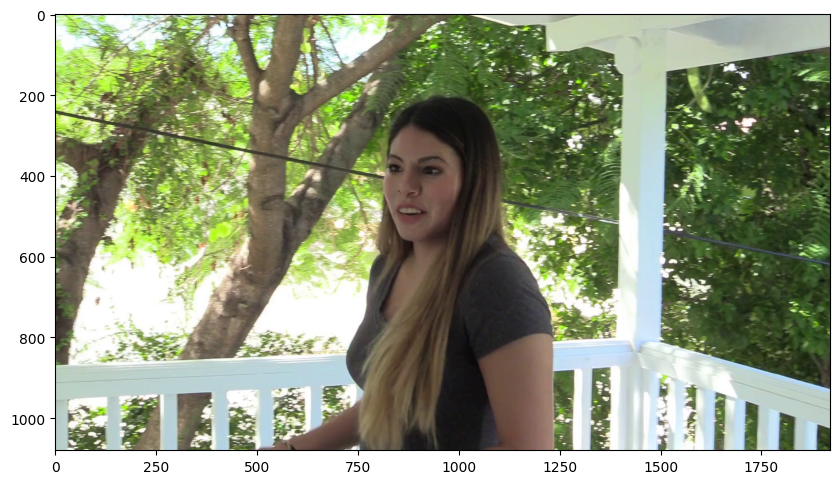

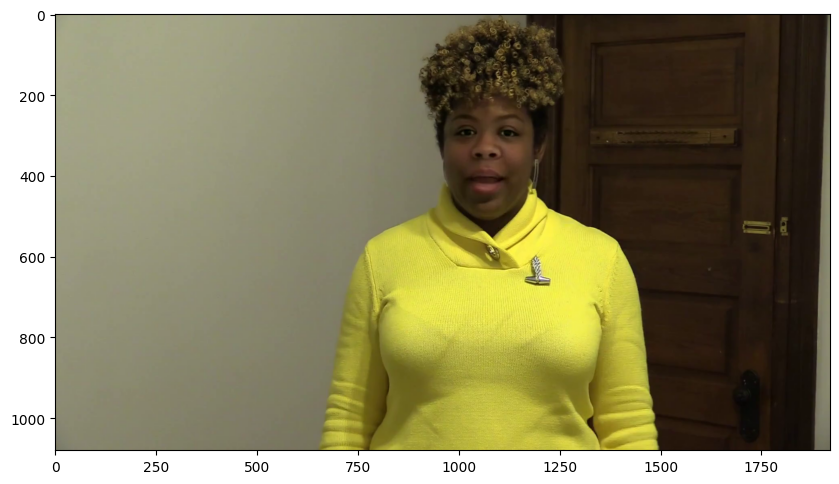

In [15]:
for video_file in fake_train_sample_video:
    display_image_from_videos(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file))

In [16]:
real_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.label == 'REAL'].sample(5).index)
real_train_sample_video

['dbnygxtwek.mp4',
 'chtapglbcj.mp4',
 'cobjrlugvp.mp4',
 'ahqqqilsxt.mp4',
 'efwfxwwlbw.mp4']

In [ ]:
for video_file in real_train_sample_video:
    display_image_from_videos(os.path.join(DATA_FOLDER, TRAIN_SAMPLE_FOLDER, video_file))

In [ ]:
train_sample_metadata['original'].value_counts()[0:5]

In [ ]:
def display_image_from_video_list(video_path_list, video_folder=TRAIN_SAMPLE_FOLDER):
    plt.figure()
    fig,axes = plt.subplots(2, 3, figsize=(16, 8))
    for i, video_file in enumerate(video_path_list[0:6]):
        video_path = os.path.join(DATA_FOLDER, video_folder, video_file)
        cap = cv2.VideoCapture(video_path)
        ret, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        axes[i//3, i%3].imshow(frame)
        axes[i//3, i%3].set_title(f"Video: {video_file}")
        axes[i//3, i%3].axis('on')

In [ ]:
same_original_fake_train_sample_video = list(train_sample_metadata.loc[train_sample_metadata.original == 'atvmxvwyns.mp4'].index)
display_image_from_video_list(same_original_fake_train_sample_video)

In [ ]:
test_videos = pd.DataFrame(list(os.listdir(os.path.join(DATA_FOLDER, TEST_FOLDER))), columns=['videos'])

In [ ]:
test_videos.head()

In [ ]:
display_image_from_videos(os.path.join(DATA_FOLDER, TEST_FOLDER, test_videos.iloc[2].videos))

In [ ]:
fake_videos = list(train_sample_metadata.loc[train_sample_metadata.label == 'FAKE'].index)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def play_video(video_file, subset=TRAIN_SAMPLE_FOLDER):
    video_url = open(os.path.join(DATA_FOLDER, subset, video_file), 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(video_url).decode()
    return HTML("""
    <video width=400 controls>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url)

play_video(fake_videos[10])

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 25

MAX_SEQ_LENGTH = 20
NUM_FEATURES = 2048

In [ ]:
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]

def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)
            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [ ]:
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input
    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)
    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")

feature_extractor = build_feature_extractor()

In [ ]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = list(df.index)
    labels = df["label"].values
    labels = np.array(labels == 'FAKE').astype('int')
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    for idx, path in enumerate(video_paths):
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                    )
                temp_frame_mask[i, :length] = 1
            frame_features[idx,] = temp_frame_features.squeeze()
            frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels

In [ ]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(train_sample_metadata, test_size=0.2, random_state=42, stratify=train_sample_metadata['label'])
print(f"Train set size: {len(Train_set)}")
print(f"Test set size: {len(Test_set)}")

In [ ]:
train_data, train_labels = prepare_all_videos(Train_set, "train")
test_data, test_labels = prepare_all_videos(Test_set, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

In [ ]:
frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
mask_input = keras.Input((MAX_SEQ_LENGTH,), dtype="bool")

x = keras.layers.GRU(16, return_sequences=True)(frame_features_input, mask=mask_input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.GRU(32, return_sequences=True)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.GRU(16)(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(32, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
output = keras.layers.Dense(1, activation="sigmoid")(x)

model = keras.Model([frame_features_input, mask_input], output)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.summary()

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = keras.callbacks.ModelCheckpoint('./model_weights.weights.h5', save_weights_only=True, save_best_only=True)

history = model.fit(
    [train_data[0], train_data[1]],
    train_labels,
    validation_data = ([test_data[0], test_data[1]], test_labels),
    callbacks=[checkpoint, early_stopping],
    batch_size=16,
    epochs=EPOCHS
)

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo--', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'ro--', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo--', label='Training loss')
plt.plot(epochs, val_loss, 'ro--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")
    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length]
    return frame_features, frame_mask

def sequence_prediction(path):
    frames = load_video(os.path.join(DATA_FOLDER, TEST_FOLDER, path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = model.predict([frame_features, frame_mask])[0]
    return probabilities

def to_gif(images):
    converted_images = images.astype(np.uint8)
    imageio.mimsave('animation.gif', converted_images, fps=10)
    return embed.embed_file('animation.gif')

test_video = np.random.choice(test_videos["videos"].values.tolist())
print(f"Test video path: {test_video}")

if(sequence_prediction(test_video)>=0.5):
    print("The video is Fake")
else:
    print("The video is Real")

play_video(test_video, TEST_FOLDER)

In [ ]:
model.save('deepfake_video_detector.h5')

In [ ]:
from google.colab import files
files.download('deepfake_video_detector.h5')
